In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler


from DataProduction import dataProd

import warnings
warnings.filterwarnings('ignore')

# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Data production and loading
run_list = [285490, 286498, 287987, 288543, 289413, 289733, 291970, 293528]
planes_list = ['UTaX', 'UTaU', 'UTbV', 'UTbX']

# dataProduction = dataProd()
# mix_ = dataProduction.multipleRun(*run_list)
# mix = mix_.copy()

import random
random.seed(46)

from scipy.special import kl_div,softmax
sns.set(
    context='notebook',  # 'paper', 'notebook', 'talk', 'poster'
    style='darkgrid',   # 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
    palette='deep',      # Color palette
    font='sans-serif',   # Font family
    font_scale=0.75,      # Font scale
    rc={'figure.figsize': (12, 6)}  # Default figure size
)

### Simulation Data Generation.

In [2]:
class simData():

    def __init__(self,num_chips,pseudo_random):

        np.random.seed(pseudo_random)
        self.num_chips = num_chips

        chips = {}
        for i in range(self.num_chips): #One side of 1024 chips [512]
            chips[f'chip{i+1}'] = np.random.laplace(loc=0.0, scale=1.0, size=128) # For 1 Plane, 1024 ASICS, 128 Channel Each

        self.all_chips_pedestals = pd.DataFrame(chips)

        # return self.all_chips_pedestals

    def pedestals_data(self):
        return self.all_chips_pedestals

    def chip_average(self):
        self.average_pedestal_per_chip = np.mean(self.all_chips_pedestals,axis=0).values#.reshape(int(self.num_chips/16),16)

        return self.average_pedestal_per_chip 

In [3]:
num_chips = 16 #Easy Visualisation

### Case1 : Same Distribution of Laplacian

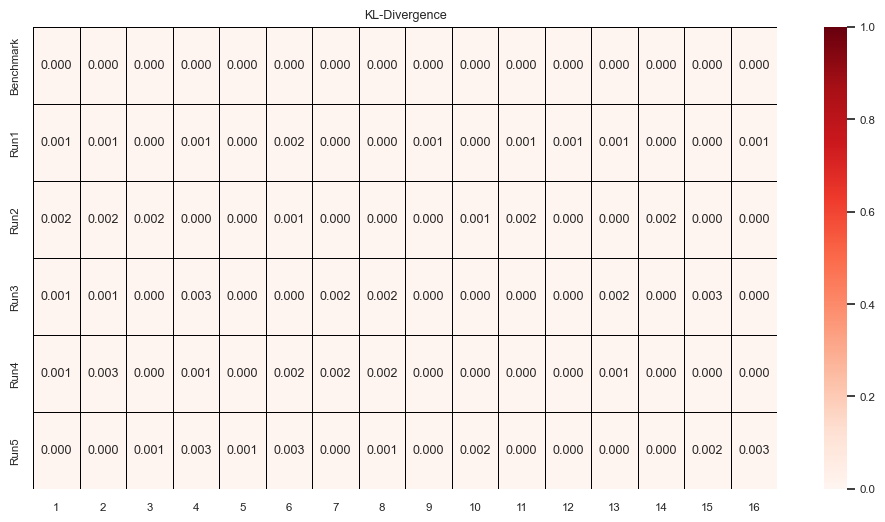

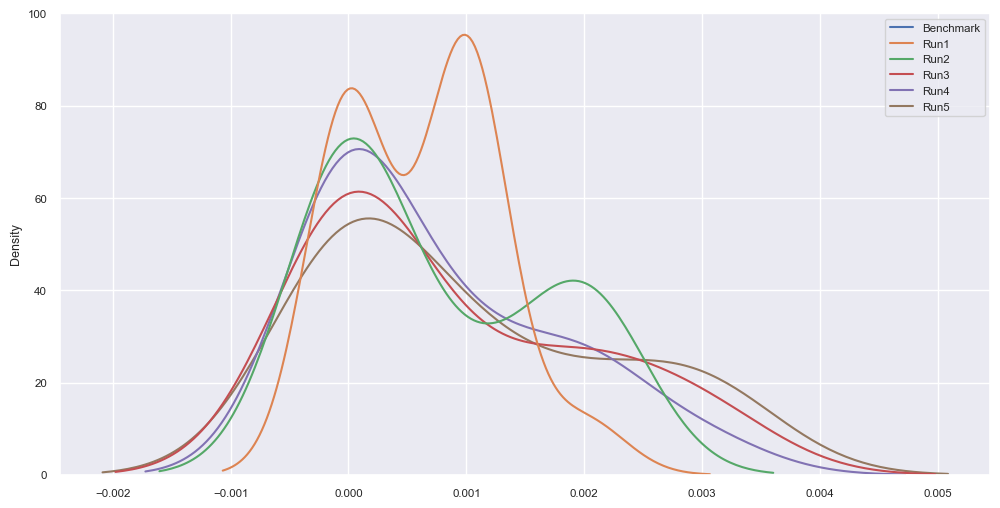

In [4]:
chip_data_simple = simData(num_chips,59).chip_average()
# plt.plot(chip_data_simple)
# plt.plot(chip_data_simple)

master_probability = softmax(chip_data_simple)

kl_div_data=pd.DataFrame(index=np.arange(1,num_chips+1))

kl_div_data['Benchmark'] = kl_div(master_probability,master_probability)

for runs in range(5):
    chip_data = simData(num_chips,runs).chip_average()
    chip_probability = softmax(chip_data)
    
    kl_div_data['Run' + str(runs+1)]  = np.round(kl_div(master_probability,chip_probability),3)


plt.title('KL-Divergence')
sns.heatmap(kl_div_data.T,cmap='Reds',xticklabels=True, yticklabels=True,linewidths=0.5,linecolor='black',annot=True,fmt='0.3f',vmin=0,vmax=1)
plt.show()

sns.kdeplot(kl_div_data)
plt.show()

### Case2 : Laplacian Distribution and the Distribution with ten outlier peaks.

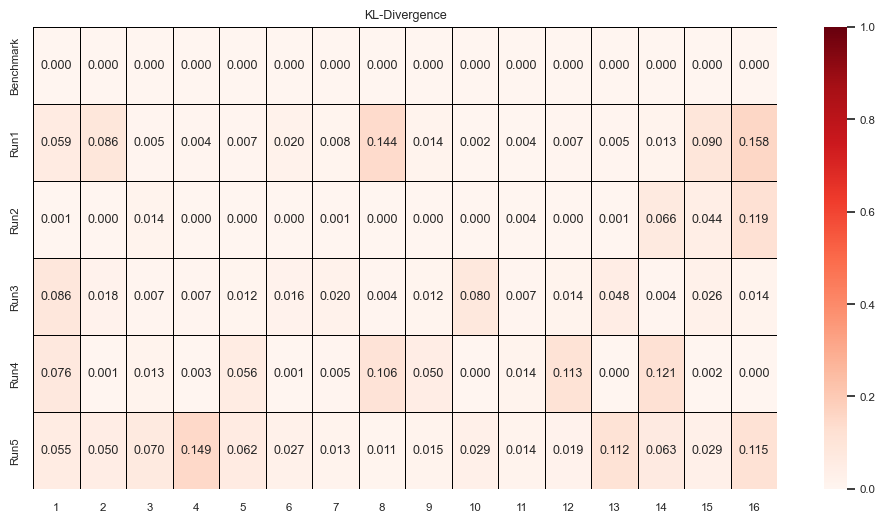

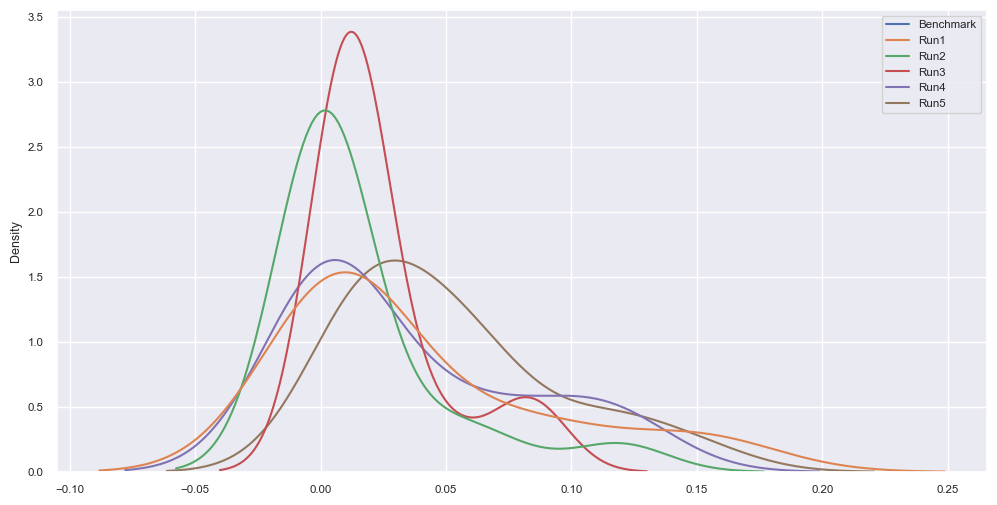

In [5]:
chip_data = simData(num_chips,12).chip_average()

# plt.plot(chip_data)
# plt.plot(chip_data_simple)


master_probability = softmax(chip_data_simple)

kl_div_data=pd.DataFrame(index=np.arange(1,num_chips+1))

kl_div_data['Benchmark'] = kl_div(master_probability,master_probability)

for runs in range(5):
    chip_data = simData(num_chips,runs).chip_average()
    for i in range(10):
        chip_data[np.random.randint(num_chips)]=np.random.randint(-3,3)
        chip_probability = softmax(chip_data)
    
    kl_div_data['Run' + str(runs+1)]  = kl_div(master_probability,chip_probability)


plt.title('KL-Divergence')
sns.heatmap(kl_div_data.T,cmap='Reds',xticklabels=True, yticklabels=True,linewidths=0.5,linecolor='black',annot=True,fmt='0.3f',vmin=0,vmax=1)
plt.show()

sns.kdeplot(kl_div_data)
plt.show()

### Case3 : Laplacian Distribution and the Distribution with ten peaks but higher values for outliers

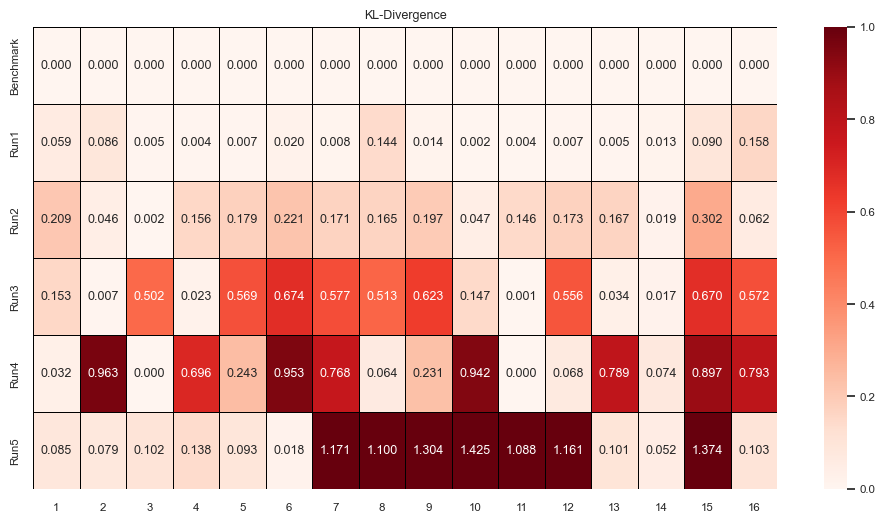

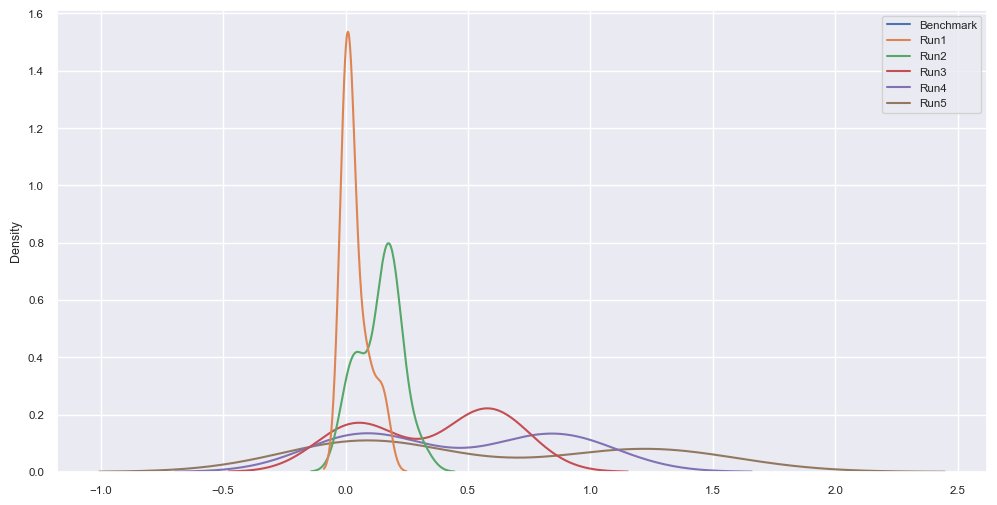

In [6]:
chip_data = simData(num_chips,12).chip_average()

# plt.plot(chip_data)
# plt.plot(chip_data_simple)


master_probability = softmax(chip_data_simple)

kl_div_data=pd.DataFrame(index=np.arange(1,num_chips+1))

kl_div_data['Benchmark'] = kl_div(master_probability,master_probability)

for runs in range(5):
    chip_data = simData(num_chips,runs).chip_average()
    for i in range(10):
        chip_data[np.random.randint(num_chips)]=np.random.randint(-3+(runs*5),3+(runs*5))
        chip_probability = softmax(chip_data)
    
    kl_div_data['Run' + str(runs+1)]  = kl_div(master_probability,chip_probability)


plt.title('KL-Divergence')
sns.heatmap(kl_div_data.T,cmap='Reds',xticklabels=True, yticklabels=True,linewidths=0.5,linecolor='black',annot=True,fmt='0.3f',vmin=0,vmax=1)
plt.show()

sns.kdeplot(kl_div_data)

plt.show()

### Case4 : Laplacian Distribution and Significant Zero Pedestals

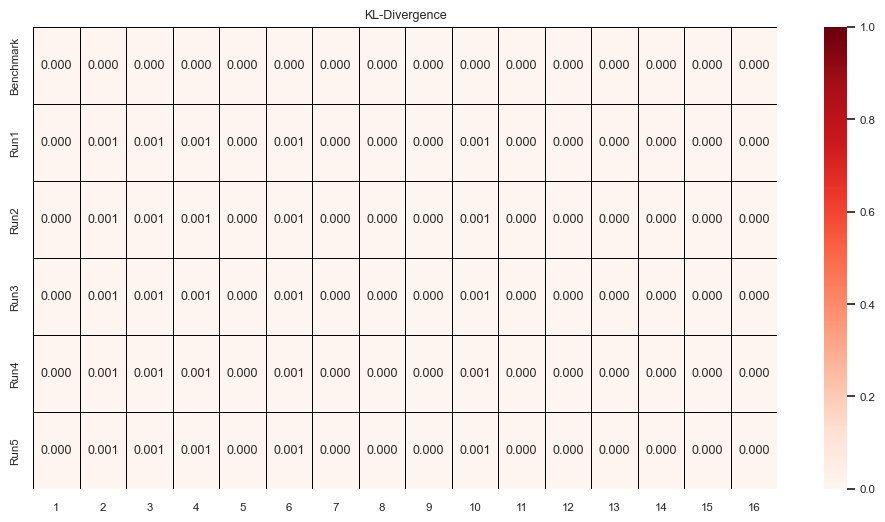

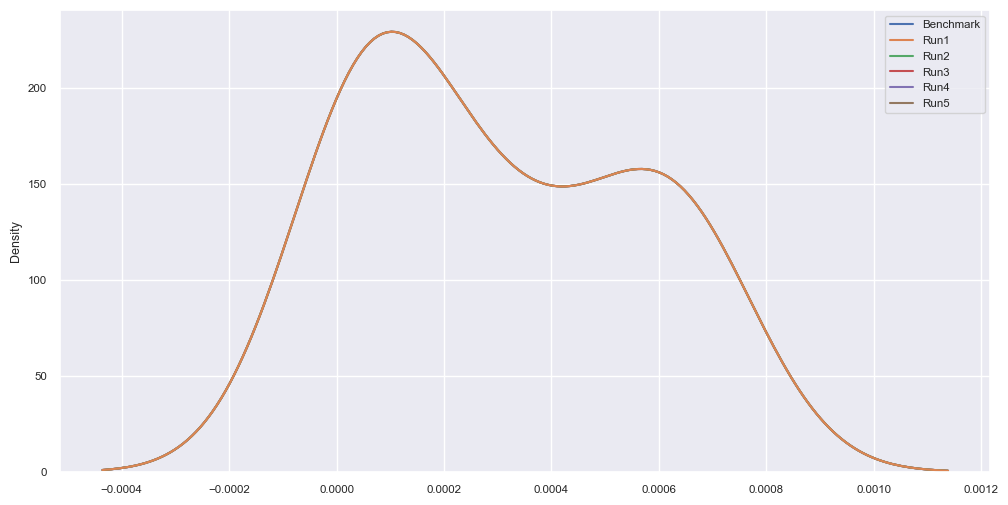

In [7]:
chip_data = simData(num_chips,12).chip_average()
for i in range(100):
    chip_data[np.random.randint(num_chips)]=np.random.randint(1)
# plt.plot(chip_data_simple)
# plt.plot(chip_data)



master_probability = softmax(chip_data_simple)

kl_div_data=pd.DataFrame(index=np.arange(1,num_chips+1))

kl_div_data['Benchmark'] = kl_div(master_probability,master_probability)

for runs in range(5):
    chip_data = simData(num_chips,runs).chip_average()
    for _ in range(100):
        chip_data[np.random.randint(num_chips)]=np.random.randint(1)
        chip_probability = softmax(chip_data)
    
    kl_div_data['Run' + str(runs+1)]  = kl_div(master_probability,chip_probability)


plt.title('KL-Divergence')
sns.heatmap(kl_div_data.T,cmap='Reds',xticklabels=True, yticklabels=True,linewidths=0.5,linecolor='black',annot=True,fmt='0.3f',vmin=0,vmax=1)
plt.show()

sns.kdeplot(kl_div_data)
plt.show()


### Case4 : Laplacian Distribution and Zero Pedestals Distributions.

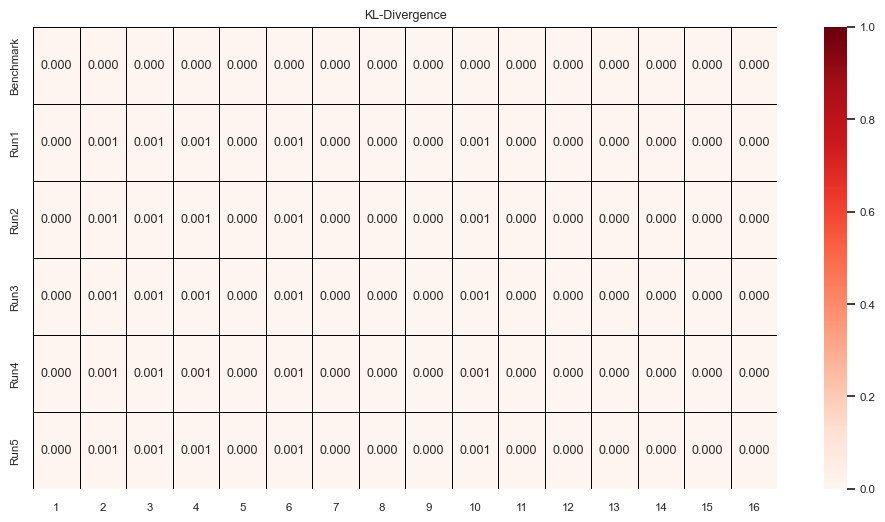

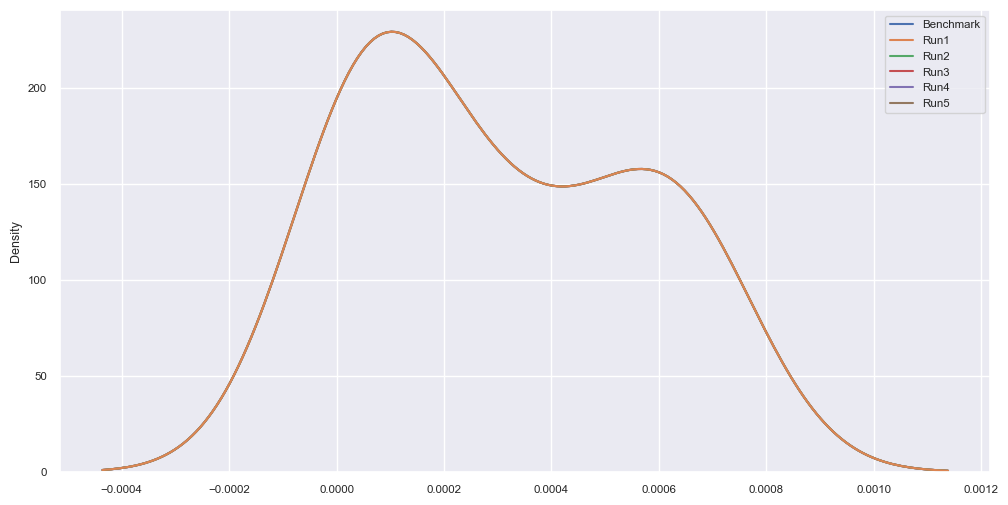

In [8]:
chip_data = np.zeros(num_chips)
# plt.plot(chip_data_simple)
# plt.plot(chip_data)


master_probability = softmax(chip_data_simple)

kl_div_data=pd.DataFrame(index=np.arange(1,num_chips+1))

kl_div_data['Benchmark'] = kl_div(master_probability,master_probability)

for runs in range(5):
    chip_data = simData(num_chips,runs).chip_average()
    for _ in range(100):
        chip_data = np.zeros(num_chips)
        chip_probability = softmax(chip_data)
    
    kl_div_data['Run' + str(runs+1)]  = kl_div(master_probability,chip_probability)


plt.title('KL-Divergence')
sns.heatmap(kl_div_data.T,cmap='Reds',xticklabels=True, yticklabels=True,linewidths=0.5,linecolor='black',annot=True,fmt='0.3f',vmin=0,vmax=1)
plt.show()

sns.kdeplot(kl_div_data)
plt.show()


##### More Cases